In [43]:
import pandas as pd
import numpy as np
import random

file = 'schedule_final.xls'
schedule = pd.read_excel(file)

In [44]:
array = schedule.values.tolist()
time_table = []
time_list = []
space_list = []
loc_list = []
lon_lat_list = []
room_table = []

In [45]:
from pyproj import Proj, transform
inProj = Proj("+init=epsg:3857")
outProj = Proj("+init=epsg:4326")
for i, row in enumerate(array):
    space_idx = schedule.columns.get_loc("space")
    time_idx = schedule.columns.get_loc("walk_time")
    loc_idx = schedule.columns.get_loc("Building")
    x_idx = schedule.columns.get_loc("X_Coor")
    y_idx = schedule.columns.get_loc("Y_Coor")
    
    lon_lat = transform(inProj, outProj, row[x_idx], row[y_idx])
    
    space_list.append(row[space_idx])
    time_list.append(row[time_idx])
    loc_list.append(row[loc_idx])
    lon_lat_list.append(lon_lat)

In [46]:
def checkIfExist(r1, r2, name):
    count = 0
    for row in name:
        if name == time_table:
            if r1 == row[0] and r2 == row[4]:
                num = row[len(row)-1] + 1
                row[len(row)-1] = num
                count = row[len(row)-1]
        else:
            if r1 == row[0]:
                count = 1
    return count

for i, r in enumerate(time_list):
    if i < (len(time_list) - 1) and r > 0 and r < 999:
        next_idx = i + 1
        room1 = space_list[i]
        room2 = space_list[next_idx]
        
        count = checkIfExist(room1, room2, time_table)
        
        Building1 = loc_list[i]
        Building2 = loc_list[next_idx]
        LonLat1 = lon_lat_list[i]
        LonLat2 = lon_lat_list[next_idx]
        
        if count < 1:
            time_table.append([room1, Building1] + [LonLat1[0], LonLat1[1]] + [room2, Building2] + [LonLat2[0], LonLat2[1]] + [r, 1] )


In [47]:
df = pd.DataFrame(time_table, columns = ["SpaceID_1", "Building_1", "Lon_1", "Lat_1", "SpaceID_2", "Building_2", "Lon_2","Lat_2","Walk_Time","No_of_Occurance"])
df.to_csv('time2')

from pandas import ExcelWriter

writer = ExcelWriter('time.xlsx')
df.to_excel(writer,'Sheet1')
writer.save()

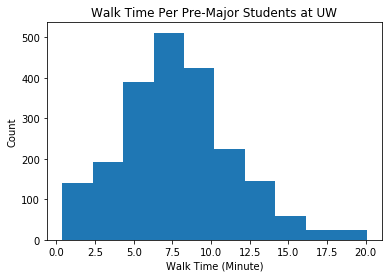

In [179]:
import matplotlib.pyplot as plt
import numpy as np

#import plotly.plotly as py

time = [i for i in time_list if i > 0 and i < 999]

plt.hist(time)
plt.title("Walk Time Per Pre-Major Students at UW")
plt.xlabel("Walk Time (Minute)")
plt.ylabel("Count")

fig = plt.gcf()

#plot_url = py.plot_mpl(fig, filename='mpl-basic-histogram')

In [188]:
# number of sampled premajor students
len(time)

2132

In [186]:
# number of students walked over 10 mins to class
over_ten_min = [i for i in time_list if i >= 10 and i < 999]
len(over_ten_min)

496

In [187]:
#percentage of students walked over 10 mins to class
percent_over_ten = int(round((len(over_ten_min) / len(time)) * 100))
percent_over_ten

23